In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import sys
import os
sys.path.append('/home/jovyan/intake-aodn/')

import intake_aodn
import pandas as pd
import intake

In [36]:
cat = intake.open_catalog('../../intake_aodn/catalogs/aodn.yaml')

In [38]:
df =cat.CPR.read().set_index('TripCode').sort_index()


In [39]:
df.SampleTime_UTC = pd.to_datetime(df.SampleTime_UTC)

In [40]:
df.index.unique()

Index(['ABAB20200227', 'ABFR20140923', 'ABFR20141203', 'ABFR20150812',
       'ABFR20151116', 'ABFR20161103', 'ABFR20170308', 'ADAB20140120',
       'ADAB20140331', 'ADAB20140610',
       ...
       'SYME20140603', 'SYME20140916', 'SYME20141126', 'SYME20150301',
       'SYME20150721', 'SYME20151110', 'SYME20160308', 'SYME20160730',
       'TINT20171001', 'TOCA20131108'],
      dtype='object', name='TripCode', length=219)

In [43]:
trip =df.loc['ABAB20200227']
trip.head(10)

,FID,Latitude,Longitude,SampleTime_UTC,SampleTime_Local,Year_Local,Month_Local,Day_Local,Time_Local24hr,PCI,...,NoPhytoSpecies_Sample,ShannonPhytoDiversity,PhytoEvenness,NoDiatomSpecies_Sample,ShannonDiatomDiversity,DiatomEvenness,NoDinoSpecies_Sample,ShannonDinoDiversity,DinoflagellateEvenness,geom
TripCode,,,,,,,,,,,,,,,,,,,,,
ABAB20200227,cpr_derived_indices_data.fid-70bc1cb9_18189445...,-37.9138,135.3310,2020-02-27 02:01:35,2020-02-27 11:31:35,2020,2,27,11:31,1,...,1.0,0.0000,NaN,0.0,NaN,NaN,1.0,0.0000,NaN,POINT (135.33099 -37.91378)
ABAB20200227,cpr_derived_indices_data.fid-70bc1cb9_18189445...,-37.8766,134.9125,2020-02-27 03:10:21,2020-02-27 12:40:21,2020,2,27,12:40,1,...,2.0,0.4506,0.6500,0.0,NaN,NaN,2.0,0.4506,0.6500,POINT (134.91247 -37.87656)
ABAB20200227,cpr_derived_indices_data.fid-70bc1cb9_18189445...,-37.8378,134.4944,2020-02-27 04:19:07,2020-02-27 13:49:07,2020,2,27,13:49,1,...,2.0,0.4506,0.6500,0.0,NaN,NaN,2.0,0.4506,0.6500,POINT (134.49437 -37.83785)
ABAB20200227,cpr_derived_indices_data.fid-70bc1cb9_18189445...,-37.7977,134.0767,2020-02-27 05:27:52,2020-02-27 14:57:52,2020,2,27,14:57,1,...,5.0,1.5117,0.9393,0.0,NaN,NaN,5.0,1.5117,0.9393,POINT (134.07673 -37.79766)
ABAB20200227,cpr_derived_indices_data.fid-70bc1cb9_18189445...,-37.7560,133.6596,2020-02-27 06:36:38,2020-02-27 16:06:38,2020,2,27,16:06,1,...,1.0,0.0000,NaN,0.0,NaN,NaN,1.0,0.0000,NaN,POINT (133.65955 -37.75601)
ABAB20200227,cpr_derived_indices_data.fid-70bc1cb9_18189445...,-37.7129,133.2428,2020-02-27 07:45:24,2020-02-27 17:15:24,2020,2,27,17:15,1,...,2.0,0.2338,0.3373,0.0,NaN,NaN,2.0,0.2338,0.3373,POINT (133.24284 -37.71288)
ABAB20200227,cpr_derived_indices_data.fid-70bc1cb9_18189445...,-37.6683,132.8266,2020-02-27 08:54:09,2020-02-27 18:24:09,2020,2,27,18:24,1,...,1.0,0.0000,NaN,0.0,NaN,NaN,1.0,0.0000,NaN,POINT (132.82663 -37.66829)
ABAB20200227,cpr_derived_indices_data.fid-70bc1cb9_18189445...,-37.6222,132.4109,2020-02-27 10:02:55,2020-02-27 19:32:55,2020,2,27,19:32,1,...,1.0,0.0000,NaN,0.0,NaN,NaN,1.0,0.0000,NaN,POINT (132.41093 -37.62224)
ABAB20200227,cpr_derived_indices_data.fid-70bc1cb9_18189445...,-37.5747,131.9958,2020-02-27 11:11:40,2020-02-27 20:41:40,2020,2,27,20:41,1,...,3.0,0.7963,0.7249,0.0,NaN,NaN,3.0,0.7963,0.7249,POINT (131.99575 -37.57473)


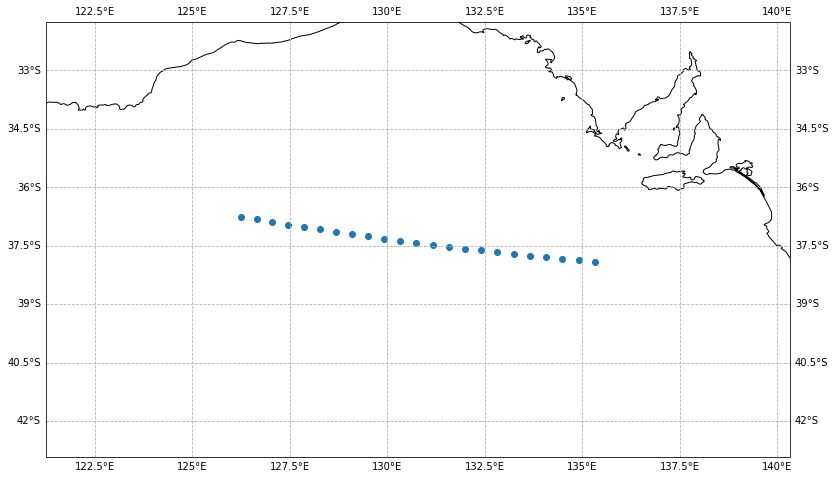

In [42]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,8))
ax = plt.axes(projection = ccrs.PlateCarree());
ax.set_extent([trip.Longitude.min()-5,trip.Longitude.max()+5,trip.Latitude.min()-5,trip.Latitude.max()+5],crs=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True,linestyle = '--')
ax.scatter(trip.Longitude,trip.Latitude)

In [30]:
from intake_aodn.utils import get_distributed_cluster
client = get_distributed_cluster(worker_cores=1, worker_memory=4.0, min_workers=30, max_workers=30)
client

An existing cluster was found. Connected to cluster easihub.88a3e659fe9b41f59916d56855d985ba


Connection method: Cluster object,Cluster type: dask_gateway.GatewayCluster
Dashboard: https://hub.csiro.easi-eo.solutions/services/dask-gateway/clusters/easihub.88a3e659fe9b41f59916d56855d985ba/status,


In [32]:
time_start=trip.SampleTime_UTC.min()-pd.to_timedelta('1D')
time_end= trip.SampleTime_UTC.max()+pd.to_timedelta('1D')
print(f'Start time is {time_start} end is {time_end}')

Start time is 2020-02-26 02:01:35 end is 2020-02-29 03:14:19


In [18]:
cropto =[trip.Longitude.min()-15,trip.Longitude.max()+15,trip.Latitude.min()-30,trip.Latitude.max()+30]
cropto

[111.246, 150.331, -67.91380000000001, -6.759300000000003]

In [19]:
dict(latitude=slice(cropto[2],cropto[3]),longitude=slice(cropto[0],cropto[1]))

{'latitude': slice(-67.91380000000001, -6.759300000000003, None),
 'longitude': slice(111.246, 150.331, None)}

In [21]:

ds  = cat.SST_L3S_1d_ngt(startdt=time_start,enddt=time_end,cropto=dict(latitude=slice(cropto[2],cropto[3]),longitude=slice(cropto[0],cropto[1]))).to_dask()

imos-data/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/199203-ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.json
simplecache::zip:///home/jovyan/intake-aodn/notebooks/cpr/imos-data/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/199203-ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.json::/home/jovyan/intake-aodn/intake_aodn/catalogs/aodn_refs.zip
imos-data/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/199204-ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.json
simplecache::zip:///home/jovyan/intake-aodn/notebooks/cpr/imos-data/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/199204-ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.json::/home/jovyan/intake-aodn/intake_aodn/catalogs/aodn_refs.zip
imos-data/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/199205-ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.json
simplecache::zip:///home/jovyan/intake-aodn/notebooks/cpr/imos-data/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/199205-ABOM-L3S_GHRSST-SSTskin-AVHRR_D-1d_night_a.json::/home/jovyan/intake-aodn/intake_aodn/catalogs/aodn_refs.zip
imos-data/IMOS/SRS/SST/ghrsst/L3S-1d/ngt/199206-ABOM-L3S_GHRSST-SST

FileNotFoundError: [Errno 2] No such file or directory: '/home/jovyan/intake-aodn/intake_aodn/catalogs/aodn_refs.zip'

In [ ]:
os.path.abspath('/home/jovyan/intake-aodn/notebooks/cpr/../../intake_aodn/catalogs//aodn_refs.zip')

In [17]:
"/home/jovyan/intake-aodn/intake_aodn/catalogs//aodn_refs.zip".replace('//','/')

'/home/jovyan/intake-aodn/intake_aodn/catalogs/aodn_refs.zip'

In [39]:
ds['sea_surface_temperature']-= 273.15 # Kelvin to Celsuis conversion
#ds['sea_surface_temperature'] = ds['sea_surface_temperature'].where(ds['quality_level'] >=4)# keep only good quality data

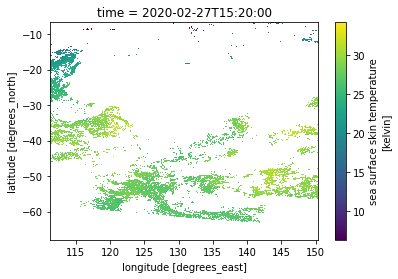

In [40]:
ds.isel(time=1).sea_surface_temperature.plot(x='longitude',y='latitude')

In [30]:
ds

<xarray.Dataset>
Dimensions:                  (time: 3, latitude: 3058, longitude: 1955)
Coordinates:
  * latitude                 (latitude) float32 -67.91 -67.89 ... -6.79 -6.77
  * longitude                (longitude) float32 111.2 111.3 ... 150.3 150.3
  * time                     (time) datetime64[ns] 2020-02-26T15:20:00 ... 20...
Data variables:
    dt_analysis              (time, latitude, longitude) float32 dask.array<chunksize=(3, 3058, 1955), meta=np.ndarray>
    l2p_flags                (time, latitude, longitude) float32 dask.array<chunksize=(3, 3058, 1955), meta=np.ndarray>
    quality_level            (time, latitude, longitude) float32 dask.array<chunksize=(3, 3058, 1955), meta=np.ndarray>
    satellite_zenith_angle   (time, latitude, longitude) float32 dask.array<chunksize=(3, 3058, 1955), meta=np.ndarray>
    sea_surface_temperature  (time, latitude, longitude) float32 dask.array<chunksize=(3, 3058, 1955), meta=np.ndarray>
    sses_bias                (time, latitude, longitude) float32 dask.array<chunksize=(3, 3058, 1955), meta=np.ndarray>
    sses_count               (time, latitude, longitude) float32 dask.array<chunksize=(3, 3058, 1955), meta=np.ndarray>
    sses_standard_deviation  (time, latitude, longitude) float32 dask.array<chunksize=(3, 3058, 1955), meta=np.ndarray>
    sst_dtime                (time, latitude, longitude) float64 dask.array<chunksize=(3, 1529, 1955), meta=np.ndarray>

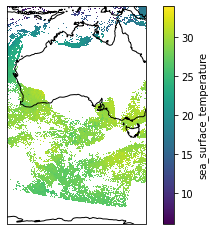

In [23]:
p =ds.sea_surface_temperature.mean(dim='time').plot(x='longitude',y='latitude',subplot_kws={'projection': ccrs.PlateCarree()},xlim=cropto[0:2],ylim=cropto[2:4])
p.axes.coastlines()

In [114]:
ds

<xarray.Dataset>
Dimensions:                  (time: 3, latitude: 0, longitude: 1955)
Coordinates:
  * latitude                 (latitude) float32 
  * longitude                (longitude) float32 111.2 111.3 ... 150.3 150.3
  * time                     (time) datetime64[ns] 2020-02-26T15:20:00 ... 20...
Data variables:
    dt_analysis              (time, latitude, longitude) float32 
    l2p_flags                (time, latitude, longitude) float32 
    quality_level            (time, latitude, longitude) float32 
    satellite_zenith_angle   (time, latitude, longitude) float32 
    sea_surface_temperature  (time, latitude, longitude) float32 
    sses_bias                (time, latitude, longitude) float32 
    sses_count               (time, latitude, longitude) float32 
    sses_standard_deviation  (time, latitude, longitude) float32 
    sst_dtime                (time, latitude, longitude) float64